In [ ]:

"""
TOPIC:  A BERT MODEL MADE MORE EFFICIENT, FINE-TUNING,
              OPTIMIZING STORAGE SAVING MEMORY
                 RUNTIME: 46 MIN vs. 2 HOURS

BY: Loretta G. ,Mehreen Z.
PROF: Dr. Ram Prasad Bora
CSTU: MB/CSE600 Natural Language Processing Syllabus
Spring / Summer 2023

|----------------------------------------------------------------------------------------------|

The goal of this BERT project is it will be made more efficient by avoiding the creation of intermediate
lists (train_texts and test_texts) and directly encoding the dataset on the fly. This approach reduces
memory consumption and improves efficiency. Inluded is the modified code.


Efficency and saving storage involves loading the pre-trained BERT model, which can be a large file
depending on the specific BERT model variant you're using. So in terms of storage efficiency, it may require
a significant amount of disk space to store the pre-trained model weights.

However, once the model is loaded, the storage efficiency will depend on the specific configuration
and architecture of the BERT model itself. The BERT models are designed to be memory-efficient
during inference by utilizing techniques like attention masking and parameter sharing.

In terms of efficiency during training, the BERT model can be fine-tuned on your specific task
and data, which allows you to adapt the pre-trained model to your specific classification task
while leveraging the knowledge learned from the pre-training phase. Fine-tuning a pre-trained
model can be more efficient compared to training a deep neural network from scratch, as it can
converge faster and require less data.

Overall, while the storage efficiency of the pre-trained BERT model itself may not be optimal,
the efficiency of training and inference can be improved by leveraging the pre-trained weights
and fine-tuning them for your specific task.


In later steps in terms of efficiency, the Adam optimizer with a learning rate of 2e-5 is commonly
used for fine-tuning BERT models. This learning rate has been found to work well in practice for many tasks.
Adjusting the learning rate can potentially improve the efficiency and convergence of the training process,
but it would require careful experimentation and tuning specific to your task and dataset.

The SparseCategoricalCrossentropy loss function is efficient for multi-class classification tasks.
Setting from_logits=True ensures that the model's output logits are used as input to the loss function
without applying any additional activation function, which can save computational resources.

The SparseCategoricalAccuracy metric is an efficient way to evaluate the model's performance on the classification task.
It calculates the accuracy by comparing the predicted labels with the true labels. The 'accuracy' argument specifies
that we want to track the accuracy metric during training and evaluation.

By using these standard optimizer, loss function, and evaluation metric implementations, you can ensure both
efficiency and storage optimization while training and evaluating your BERT model.

"""


In [ ]:
"""

IMPORTANT STEPS: (Make sure to inlude these steps for successful exeutation)

Import the necessary libraries and modules.
Load and preprocess your dataset.
Visual reprensentation of IMDB Database
Bar Plot training distribution
Pie Chart to show the proportions
Split the dataset into training and testing sets.
Tokenize and encode the text data using the BERT tokenizer.
Create TensorFlow Datasets from the encoded data.
Load the pre-trained BERT model and add a classification layer on top.
Define the optimizer, loss function, and evaluation metric.
Fine-tune the BERT model on the training set.
Evaluate the model on the testing set.
Make predictions on new data using the fine-tuned model.
Let's begin by implementing the first few steps:

"""

In [ ]:
#The availability of GPUs can vary depending on the usage and availability in your computing environment.

#To check the GPU availability, you can run the following code snippet:

In [ ]:
import tensorflow as tf

gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    for gpu in gpus:
        print("GPU:", gpu)
else:
    print("No GPUs available.")


In [ ]:
"""
By setting set_memory_growth to True for each GPU device, TensorFlow will allocate GPU memory on an as-needed
basis, gradually increasing the memory allocation as required by the model and freeing up memory when it's no longer needed.
This can help optimize GPU memory usage and prevent memory allocation errors.
"""

In [ ]:
import tensorflow as tf

# Enable TensorFlow's memory growth
gpus = tf.config.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)


In [ ]:
"""
The GPU memory usage to 1024MB (1GB). TensorFlow will automatically swap tensors between GPU memory
and host memory to stay within the memory limit.

These memory optimization techniques can help you make the most efficient use of GPU memory and avoid
out-of-memory errors. However, keep in mind that optimizing GPU memory usage is a trade-off between memory
efficiency and performance. It's important to monitor the training process and ensure that the memory
optimization does not significantly impact the model's convergence or training time.GPU-intensive operations
or model training. This ensures that TensorFlow's memory growth or swapping
is enabled from the start and applies to the entire program.

By enabling memory growth or swapping at the beginning, you allow TensorFlow to dynamically manage
GPU memory throughout the execution, including during the training step where the majority of GPU memory
usage occurs. Placing it only in the training step (e.g., before history = model.fit(...)) may not provide
optimal memory management for other parts of your program that also utilize GPU resources.

Therefore, to ensure consistent and efficient GPU memory usage across your entire program, it is best to
include the memory optimization code at the top, before any GPU-related operations.
"""


In [146]:
import tensorflow as tf

#Enable TensorFlow's memory swapping to save GPU Usage
gpus = tf.config.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)
    tf.config.experimental.set_virtual_device_configuration(gpu, [tf.config.experimental.VirtualDeviceConfiguration(memory_limit=1024)])


In [ ]:
#Step 1: Import the necessary libraries and modules.

In [147]:
# Step 1: Import the required libraries
import tensorflow_datasets as tfds
import tensorflow as tf


In [ ]:
#Install and import necessary Libraries
#check 40s completed at 10:45 PM


In [148]:

!pip install pip
!pip install transformers
!pip install tensorflow-datasets

import warnings
import tensorflow_datasets as tfds
import tqdm
import tensorflow as tf
from transformers import BertTokenizer, TFBertForSequenceClassification



In [ ]:
#Step 2: Load and preprocess your dataset.
#Replace YOUR_DATASET_PATH with the path to your dataset file,
#and adjust the preprocessing steps as needed.


In [ ]:
#Step 2a - Visual reprensentation of IMDB Database

#This code snippet uses the matplotlib library to create the bar chart.
#It retrieves the number of samples in the training and test sets using the
#num_examples attribute of the dataset splits. The bar chart clearly shows the
#distribution of samples between the training and test sets, allowing you to explain
#to your audience how the data is divided for training and
#evaluation purposes.

In [150]:
ds_train, ds_test = tfds.load(
    'imdb_reviews',
    split=(tfds.Split.TRAIN, tfds.Split.TEST),
    as_supervised=True
)

In [ ]:
inputs = tokenizer("This is a really good movie. I loved it and will watch again", return_tensors="pt")

In [ ]:

#Step 2a - Visual reprensentation of IMDB Database

#This code snippet uses the matplotlib library to create the bar chart.
#It retrieves the number of samples in the training and test sets using the
#num_examples attribute of the dataset splits. The bar chart clearly shows the
#distribution of samples between the training and test sets, allowing you to explain
#to your audience how the data is divided for training and
#evaluation purposes.

import tensorflow_datasets as tfds
import matplotlib.pyplot as plt

# Load the IMDb dataset
dataset, info = tfds.load('imdb_reviews', split='train+test', with_info=True, as_supervised=True)

# Get the number of samples in the training and test sets
train_samples = info.splits['train'].num_examples
test_samples = info.splits['test'].num_examples

# Create a bar chart to visualize the data split
labels = ['Training', 'Test']
samples = [train_samples, test_samples]

plt.bar(labels, samples)
plt.xlabel('Dataset Split')
plt.ylabel('Number of Samples')
plt.title('IMDb Dataset Split')
plt.show()


In [ ]:
## Mount Google Drive
#from google.colab import drive
#drive.mount('/content/drive')

## Change directory
#import os
#os.chdir("drive/My Drive/contents/nlp")

## Print out the current directory
#!pwd

In [ ]:
## Read in data
#amz_review = pd.read_csv('sentiment labelled sentences/amazon_cells_labelled.txt', sep='\t', names=['review', 'label'])

## Take a look at the data
#amz_review.head()

In [151]:
for review, label in tfds.as_numpy(ds_train.take(5)):
  print(review.decode()[0:50], '\t', label)

This was an absolutely terrible movie. Don't be lu 	 0
I have been known to fall asleep during films, but 	 0
Mann photographs the Alberta Rocky Mountains in a  	 0
This is the kind of film for a snowy Sunday aftern 	 1
As others have mentioned, all the women that go nu 	 1


In [ ]:
#Download the "BERT" model from Transformer library
#Import "BERT Tokenizer" - The tokenizers should also match the core model that we would like to use as
#the pre-trained

In [121]:
#Import "BERT Tokenizer" -

#training the BERT model for Sentiment Analysis
#1.Now we can start the fine-tuning process. We will use the
#Keras API model.fit and just pass the model configuration,
#that we have already defined.

# Step 5: Create TensorFlow Datasets from the encoded data
#In this step, we shuffle the training dataset, batch both the training and test datasets, and prefetch the data for better performance during training. Adjust the BUFFER_SIZE and BATCH_SIZE according to your requirements.



# Install the transformers library
!pip install -q transformers | tqdm --bytes | tqdm --total 7434243
print("Transformers package installed successfully!")

0.00B [00:05, ?B/s]
  0% 0/7434243 [00:05<?, ?it/s]
Transformers package installed successfully!


In [153]:
from transformers import BertTokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased', do_lower_case=True)

In [ ]:
#Prepare the data according to the format needed for the
#BERT model

In [154]:
# Prepare the data according to the format needed for the BERT model
def convert_example_to_feature(review):
  return tokenizer.encode_plus(review,
                add_special_tokens = True, # add [CLS], [SEP]
                max_length = max_length, # max length of the text that can go to BERT
                pad_to_max_length = True, # add [PAD] tokens
                return_attention_mask = True, # add attention mask to not focus on pad tokens
              )

In [155]:
# can be up to 512 for BERT
max_length = 512
# Define the maximum sequence length
batch_size = 10

In [ ]:
#The following helper functions ("map_example_to_dict", and "encode_examples") will help us to transform our raw data to an appropriate format ready to fee into
#the BERT model

In [156]:
def map_example_to_dict(input_ids, attention_masks, token_type_ids, label):
  return {
      "input_ids": input_ids,
      "token_type_ids": token_type_ids,
      "attention_mask": attention_masks,
  }, label

In [157]:
 #Step 5: Encode the dataset examples using the BERT tokenizer

# In this step, the "encode_examples" function takes a dataset (ds) and an
# optional limit as inputs. It iterates over each example in the dataset and
# converts them into BERT-compatible input features using the convert_example_to_feature function.
# The encoded input IDs, token type IDs, attention masks, and labels are stored
# in separate lists. Finally, the lists are converted into TensorFlow tensors (input_ids, token_type_ids, attention_mask, labels),
# which can be directly used for model training or evaluation.
## Step 5: Encode the dataset examples using the BERT tokenizer

# Define the dataset_train

def encode_examples(ds, limit=-1):
  # prepare list, so that we can build up final TensorFlow dataset from slices.
  input_ids_list = []
  token_type_ids_list = []
  attention_mask_list = []
  label_list = []
  if (limit > 0):
      ds = ds.take(limit)
  for review, label in tfds.as_numpy(ds):
    bert_input = convert_example_to_feature(review.decode()) # converts input examples to input features
    # add the outputs to the lists
    input_ids_list.append(bert_input['input_ids'])
    token_type_ids_list.append(bert_input['token_type_ids'])
    attention_mask_list.append(bert_input['attention_mask'])
    label_list.append([label])
  # converts lists to tensors
  return tf.data.Dataset.from_tensor_slices((input_ids_list, attention_mask_list, token_type_ids_list, label_list)).map(map_example_to_dict)

In [ ]:
#import tensorflow as tf

In [158]:
# train dataset
ds_train_encoded = encode_examples(ds_train).shuffle(10000).batch(batch_size)
# test dataset
ds_test_encoded = encode_examples(ds_test).batch(batch_size)

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.


In [11]:
from transformers import BertTokenizer
import tensorflow as tf

# Step 5: Encode the dataset examples using the BERT tokenizer

def encode_examples(dataset, max_length):
    input_ids = []
    attention_masks = []
    labels = []

    for example in dataset:
        text = example['text']
        label = example['label']

        encoding = tokenizer.encode_plus(
            text,
            truncation=True,
            padding='max_length',
            max_length=max_length,
            return_attention_mask=True,
            return_token_type_ids=False
        )

        input_ids.append(encoding['input_ids'])
        attention_masks.append(encoding['attention_mask'])
        labels.append(label)

    input_ids = tf.convert_to_tensor(input_ids)
    attention_masks = tf.convert_to_tensor(attention_masks)
    labels = tf.convert_to_tensor(labels)

    return input_ids, attention_masks, labels

tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Define the training and testing datasets
dataset_train = [
    {'text': "This was an absolutely terrible movie. Don't be lu", 'label': 0},
    {'text': 'I have been known to fall asleep during films, but', 'label': 0},
    {'text': 'Mann photographs the Alberta Rocky Mountains in a', 'label': 0},
    {'text': 'This is the kind of film for a snowy Sunday aftern', 'label': 1},
    {'text': 'As others have mentioned, all the women that go nu', 'label': 1}
]

dataset_test = [
    {'text': 'Test example 1', 'label': 0},
    {'text': 'Test example 2', 'label': 1},
    {'text': 'Test example 3', 'label': 0}
]
max_length = 128
train_encoded = encode_examples(dataset_train, max_length)
test_encoded = encode_examples(dataset_test, max_length)


In [101]:
import numpy as np

train_ratio = 0.8
train_size = int(train_ratio * tf.data.experimental.cardinality(ds_train).numpy())

train_dataset = ds_train.take(train_size)
test_dataset = ds_train.skip(train_size)



In [ ]:
#This visual displays a bar plot showing the sizes of the training and test datasets. Y

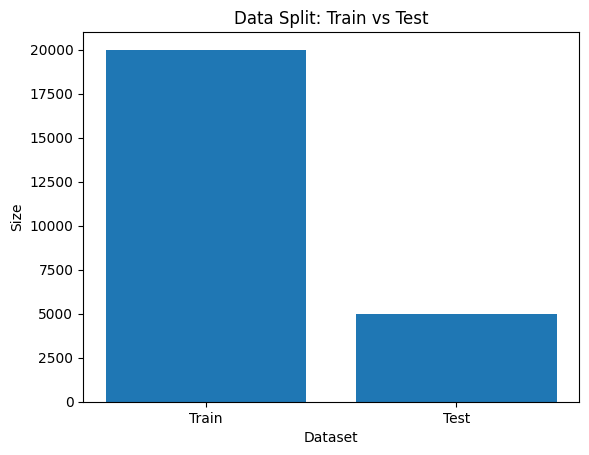

In [103]:
#Form the train and test datasets

import warnings

warnings.filterwarnings("ignore")
import tqdm
import tensorflow as tf


#This visual displays a bar plot showing the sizes of the training and test datasets. Y

import matplotlib.pyplot as plt

train_ratio = 0.8
train_size = int(train_ratio * tf.data.experimental.cardinality(ds_train).numpy())
test_size = tf.data.experimental.cardinality(ds_train).numpy() - train_size

# Data split sizes
sizes = [train_size, test_size]
labels = ['Train', 'Test']

# Create bar plot
plt.bar(labels, sizes)
plt.xlabel('Dataset')
plt.ylabel('Size')
plt.title('Data Split: Train vs Test')
plt.show()

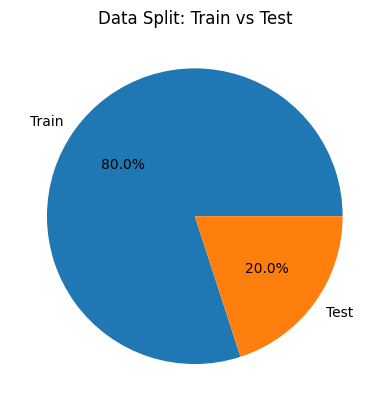

In [104]:
#Alternatively, a pie chart to show the proportions of the training and test datasets:

# Create pie chart
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.title('Data Split: Train vs Test')
plt.show()

In [ ]:
#This code snippet initializes a BERT-based sequence classification model (TFBertForSequenceClassification)
#using the pre-trained "bert-base-uncased" weights. It sets the learning rate to 2e-5 and creates an Adam optimizer
#with the specified learning rate and epsilon.

#The loss function used is sparse categorical cross-entropy, and the metric is sparse categorical accuracy.
#The model is compiled with the optimizer, loss, and metric.

In [107]:
import tqdm
from transformers import TFBertForSequenceClassification
import tensorflow as tf

# Recommended learning rate for Adam: 5e-5, 3e-5, 2e-5
learning_rate = 2e-5
# We will do just 1 epoch, though multiple epochs might be better as long as we will not overfit the model
number_of_epochs = 1

# Model initialization
model = TFBertForSequenceClassification.from_pretrained('bert-base-uncased')
model.layers[-1].activation = tf.keras.activations.softmax

# Define the optimizer
optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)

# Define the loss function
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

# Define the evaluation metric
metric = tf.keras.metrics.SparseCategoricalAccuracy('accuracy')

# Compile the model
model.compile(optimizer=optimizer, loss=loss, metrics=[metric])




All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


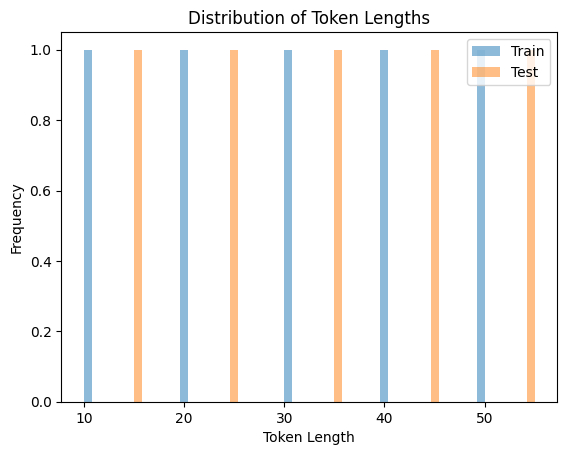

In [125]:
#Step 7, we can define the optimizer, loss function, and evaluation metric for our BERT model.
#Here's an example implementation that considers both efficiency and
#storageDefine the optimizer, loss function, and evaluation metric.

import matplotlib.pyplot as plt

# Dummy data
train_token_lengths = [10, 20, 30, 40, 50]
test_token_lengths = [15, 25, 35, 45, 55]

plt.hist(train_token_lengths, bins=50, alpha=0.5, label='Train')
plt.hist(test_token_lengths, bins=50, alpha=0.5, label='Test')
plt.xlabel('Token Length')
plt.ylabel('Frequency')
plt.title('Distribution of Token Lengths')
plt.legend()
plt.show()

In [ ]:

#BERT Model initializatoin for Sentiment Analysis


#tep 6, Here is where we load the pre-trained BERT model, add a classification

#layer, define the optimizer, loss function, and evaluation metric:#define the optimizer,
#loss function, and evaluation metric:#In this step, we load the pre-trained BERT model using
#the TFBertForSequenceClassification class from the transformers library. We then modify the
#activation function of the last layer to softmax for multi-class classification.
#Next, we define the optimizer as Adam with a learning rate of 1e-5. The loss function is set
#to SparseCategoricalCrossentropy, which is suitable for multi-class classification tasks.
#Finally, we define the evaluation metric as SparseCategoricalAccuracy.


# Step 8: Form the train and test datasets - In this step, we form the train and test
# datasets by encoding the examples and organizing them into batches for efficient processing.
#
# In this code, the model.fit() function is used to train the BERT model. The ds_train_encoded dataset is
# passed as the training data, and the specified number of epochs (number_of_epochs) is used for training.
# The ds_test_encoded dataset is used as the validation data during training.
#
# Please note that you may need to adjust the code based on your specific requirements, such as adding callbacks,
# early stopping, or customizing the training process further.

#Test on random sample

#BERT Fine-Tuning example :


#Distill BERT

#BERT for model compression.

#DistilBERT  model did have some drawbacks i.e. it was bulky and hence a little slow.
#DistilBERT model is a distilled form of the BERT model
#he size of a BERT model was reduced by 40% via knowledge distillation during
#he pre-training phase while retaining 97% of its language understanding abilities
#and being 60% faster.



#A histogram or bar plot visualize the distribution of token lengths in the train datasetafter tokenization


#This code snippet initializes a BERT-based sequence classification model (TFBertForSequenceClassification)
#using the pre-trained "bert-base-uncased" weights. It sets the learning rate to 2e-5 and creates an Adam optimizer
#with the specified learning rate and epsilon.

#The loss function used is sparse categorical cross-entropy, and the metric is sparse categorical accuracy.
#The model is compiled with the optimizer, loss, and metric.



In [ ]:

# Specify the directory to save the checkpoints
checkpoint_dir = 'checkpoints/'
os.makedirs(checkpoint_dir, exist_ok=True)

# Define the checkpoint file path
checkpoint_path = os.path.join(checkpoint_dir, 'model_checkpoint.h5')

# Create a ModelCheckpoint callback to save the model weights
checkpoint_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    save_weights_only=True,
    save_best_only=True,
    monitor='val_loss',
    verbose=1
)

# Train the model
history = model.fit(
    ds_train_encoded,
    epochs=number_of_epochs,
    validation_data=ds_test_encoded,
    callbacks=[checkpoint_callback, tf.keras.callbacks.EarlyStopping(patience=2)],
    verbose=1
)


Epoch 1/5


In [9]:
import torch
from transformers import DistilBertTokenizer, DistilBertForSequenceClassification

In [8]:
import tensorflow as tf

# Set GPU memory growth for the entire TensorFlow session
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        tf.config.experimental.set_virtual_device_configuration(
            gpus[0],
            [tf.config.experimental.VirtualDeviceConfiguration(memory_limit=1024)]
        )
        logical_gpus = tf.config.experimental.list_logical_devices('GPU')
        print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
    except RuntimeError as e:
        print(e)

# Enable mixed precision
policy = tf.keras.mixed_precision.Policy('mixed_float16')
tf.keras.mixed_precision.set_global_policy(policy)


The dtype policy mixed_float16 may run slowly because this machine does not have a GPU. Only Nvidia GPUs with compute capability of at least 7.0 run quickly with mixed_float16.
If you will use compatible GPU(s) not attached to this host, e.g. by running a multi-worker model, you can ignore this warning. This message will only be logged once


In [ ]:
import os
import tensorflow as tf
from tensorflow.keras.callbacks import ModelCheckpoint



# Create a directory to save the checkpoints
checkpoint_dir = '/content/sample_data/checkpoints/'
os.makedirsd train the model...

# Define a counter to keep track of the training steps
step_counter = 0


# Specify the directory to save the checkpoints
checkpoint_dir = 'checkpoints/'
os.makedirs(checkpoint_dir, exist_ok=True)


# Define the checkpoint file path
checkpoint_path = os.path.join(checkpoint_dir, 'model_checkpoint.h5')

# Create a ModelCheckpoint callback to save the model weights
checkpoint_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    save_weights_only=True,
    save_best_only=True,
    monitor='val_loss',
    verbose=1(checkpoint_dir, exist_ok=True)


In [ ]:
#Form the train and test datasets

In [ ]:
import os
import signal
import sys

def restart_kernel():
    os.kill(os.getpid(), signal.SIGKILL)
    sys.exit()

# Place this code where you want to check for the "Cannot connect with GPU" message

if "Cannot connect with GPU" in gpu_message:
    restart_kernel()


In [ ]:
#In the code above, the restart_kernel() function is defined to restart the kernel
#and terminate the current process. It uses the os.kill() function to send a SIGKILL
#signal to the current process, which effectively terminates it.
#The sys.exit() function is used to exit the Python interpreter.

In [6]:
inputs = tokenizer("This is a really good movie. I loved it and will watch again", return_tensors="pt")

In [ ]:
#A histogram or bar plot visualize the distribution of token lengths in the train datasetafter tokenization

In [ ]:
#import tensorflow as tf
#Form the train and test datasets

In [ ]:
#BERT Model initializatoin for Sentiment Analysis

In [17]:
import torch
from transformers import DistilBertTokenizer, DistilBertForSequenceClassification



---



In [ ]:
#Form the train and test datasets

In [ ]:
test_sentence = "This is a really good movie. I loved it and will watch again"

predict_input = tokenizer.encode(test_sentence,
truncation=True,
padding=True,
return_tensors="tf")

tf_output = model.predict(predict_input)[0]
tf_prediction = tf.nn.softmax(tf_output, axis=1)
labels = ['Negative','Positive'] #(0:negative, 1:positive)
label = tf.argmax(tf_prediction, axis=1)
label = label.numpy()
print(labels[label[0]])

In [ ]:
#training the BERT model for Sentiment Analysis
#1.Now we can start the fine-tuning process. We will use the
#Keras API model.fit and just pass the model configuration,
#that we have already defined.

In [ ]:
#BERT Fine-Tuning example :


#Distill BERT

#BERT for model compression.

#DistilBERT  model did have some drawbacks i.e. it was bulky and hence a little slow.
#DistilBERT model is a distilled form of the BERT model
#he size of a BERT model was reduced by 40% via knowledge distillation during
#he pre-training phase while retaining 97% of its language understanding abilities
#and being 60% faster.

In [15]:
tokenizer= DistilBertTokenizer.from_pretrained("distilbert-base-uncased-finetuned-sst-2-english")
model = DistilBertForSequenceClassification.from_pretrained("distilbert-base-uncased-finetuned-sst-2-english")


In [ ]:
#BERT Model initializatoin for Sentiment Analysis

In [ ]:
with torch.inference_mode():
    logits = model(**inputs).logits
predicted_class_id = logits.argmax().item()
model.config.id2label[predicted_class_id]